In [73]:
#In this we will read the .csv file generated by RMG.Py's plotting function. Specifically we will be able to generate a 
#plot of the important species and numerically calculate things like selectivity

In [2]:
from rmgpy.species import Species
import matplotlib.pyplot as plt
import pandas
import os.path
import numpy as np
%matplotlib inline

In [77]:
#Simulate the mechanism to generate a csv vile

!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/input.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t59/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t59/chemkin/species_dictionary.txt


Using Theano backend.
Simulation took 19.3021280766 seconds


/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix wi

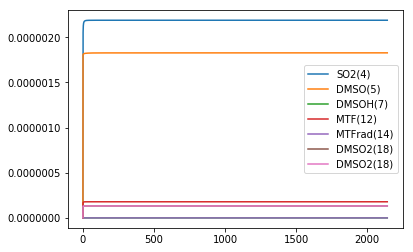

In [82]:
#This cell will generate plots of the species I care about
data = pandas.read_csv('/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t58/solver/simulation_1_47.csv')
data_mat = data.as_matrix()
#list(data)
#xvar = data.iloc[:,0]
#xvar_mat = xvar.as_matrix()
#print(xvar_mat)
#list(data.columns
for i in range(len(list(data))):
    if 'Time' in list(data)[i]:
        xvar = data.iloc[:,i]
        xvar_mat = xvar.as_matrix()
    if 'DMSO' in list(data)[i]:
        yvar1 = data.iloc[:,i]
        yvar1_mat = yvar1.as_matrix()
        plt.plot(xvar_mat, yvar1_mat, label=list(data)[i])
    if 'SO2' in list(data)[i]:
        yvar2 = data.iloc[:,i]
        yvar2_mat = yvar2.as_matrix()
        plt.plot(xvar_mat, yvar2_mat, label=list(data)[i])
    if 'MTF' in list(data)[i]:
        yvar3 = data.iloc[:,i]
        yvar3_mat = yvar3.as_matrix()
        plt.plot(xvar_mat, yvar3_mat, label=list(data)[i])
#    if 'CSO' in list(data)[i]:
#        yvar4 = data.iloc[:,i]
#        yvar4_mat = yvar4.as_matrix()
#        plt.plot(xvar_mat, yvar3_mat, label=list(data)[i])
plt.legend()
#data.plot(x='Time (s)', y='DMSO(6)')
#data.plot(x='Time (s)', y='SO2(23)')
    

In [83]:
#This cell will calculate the final selectivities toward each of the products
for i in range(len(list(data))):
    if 'DMS(1)' in list(data)[i]:
        yvar1 = data.iloc[:,i]
        yvar1_mat = yvar1.as_matrix()
        DMS_init = yvar1_mat[0]
        DMS_final = yvar1_mat[-1]
        Delta_DMS = DMS_init - DMS_final
        DMS_index = i
        
for i in range(len(list(data))):
    yvar1 = data.iloc[:,i]
    yvar1_mat = yvar1.as_matrix()
    final_mole_fraction = yvar1_mat[-1]
    print str(list(data)[i]) + ': ' + str(final_mole_fraction/Delta_DMS)
        

/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


Time (s): 356838858.954
Volume (m^3): 4128.42576699
N2: 132456.628256
Ne: 0.0
DMS(1): 1.49937029692
HOOH(2): 1.31805666726
OH(3): 2.75712519106e-10
SO2(4): 0.364719988662
DMSO(5): 0.304560760356
O2(6): 34157.9950058
DMSOH(7): 1.8773540471e-15
OOH(8): 2.10948018663e-08
C2H5O2S(9): 3.90892522757e-06
C2H5OS(10): 8.65955475444e-22
CSCOH(11): 0.0315819574402
MTF(12): 0.0297596098526
CH3(13): 2.37621791233e-15
MTFrad(14): 2.65103496118e-20
CH4(15): 1.10620024695e-05
H2O(16): 3.16433713814
S(17): 2.67194220551e-36
DMSO2(18): 0.0221045701825
CSrad(19): 1.11262187223e-12
CH3O2S(20): 6.34637747601e-14
CH2S(21): 0.0975016291354
CSOrad(22): 4.07658633054e-11
O(23): 4.20853142136e-17
CH3O2S(24): 3.46522401091e-17
CH2O3(25): 0.018039061122
CO2(26): 1.26317093622e-08
H(27): 1.14344426661e-13
HCO(32): 3.99707060324e-15
CH2O(36): 0.476315258874
CH3O(43): 2.83999460169e-10
C2H5S(53): 6.59847668624e-15
CSCOO(84): 0.122225527429
S(89): 7.43340373871e-11
S(93): 6.04043861682e-10
CHOSJ(103): 2.7484898265e-0

In [7]:
#This will automatically generate the temperature and O2 comparison plots based on a certain model
index = 54
#Read in the base input file
inputpath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/input.py' 
with open(inputpath) as f:
    log = f.read().splitlines()
#Reference the base chem.inp and species dictionary
chempath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/chemkin/chem_annotated.inp'
dictpath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/chemkin/species_dictionary.txt'
#make a new directory for the various input files and new .csv files
basepath = '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t' + str(index) + '/ExperimentalComparisons'
os.makedirs(basepath)

T_vec = [260, 270, 280, 290, 298]
O2_vec = [0, 200, 500]
N2_vec = [0.99994, 0.79994, 0.49994]

#write each of the 15 input files to their own folder in the Experimental Comparisons Folder
#Loop over temperatures
for j in range(len(T_vec)):
    #Loop over Oxygen content
    for k in range(len(O2_vec)):
        basepath2 = basepath + '/' + str(T_vec[j]) + '_' + str(O2_vec[k])
        os.makedirs(basepath2)
        filename = os.path.join(basepath2, 'input_'+ str(T_vec[j]) + '_' + str(O2_vec[k]) + '.py')
        file = open(filename, 'wb')
        for n in xrange(len(log)):
            if 'temperature=(' in log[n]:
                file.write('    temperature=(' + str(T_vec[j]) + ',\'K\'),\n')
            elif '"O2":' in log[n]:
                file.write('        "O2": 0.' + str(O2_vec[k]) +',\n')
            elif '"N2":' in log[n]:
                file.write('        "N2": ' + str(N2_vec[k]) + ',\n')
            else:
                file.write(log[n] + '\n')
        file.close()
#Run the input files with the simulate script
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/260_0/input_260_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/260_200/input_260_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/260_500/input_260_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/270_0/input_270_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/270_200/input_270_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/270_500/input_270_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/280_0/input_280_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/280_200/input_280_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/280_500/input_280_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/290_0/input_290_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/290_200/input_290_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/290_500/input_290_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/298_0/input_298_0.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/298_200/input_298_200.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons/298_500/input_298_500.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt

#Compare the DMSO, SO2, DMSO2, MTF, and OCS concentration to experiments

OSError: [Errno 17] File exists: '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/ExperimentalComparisons'

/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:48: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:58: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:53:

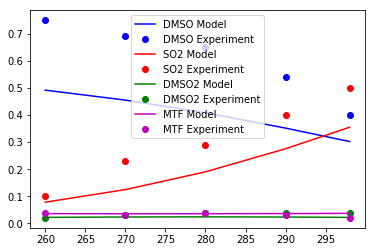

In [11]:
#This will read the .csv files generated above and create comparison plots for DMSO, SO2, DMSO2, MTF, and OCS
Tvec = [260, 270, 280, 290, 298]
Pvec = [0, 200, 500]

DMSO_exp = np.zeros((3,5))
DMSO_model = np.zeros((3,5))
DMSO_exp[1][:] = [0.75, 0.69, 0.65, 0.54, 0.4]

SO2_exp = np.zeros((3,5))
SO2_model = np.zeros((3,5))
SO2_exp[1][:] = [0.1, 0.23, 0.29, 0.4, 0.5]

DMSO2_exp = np.zeros((3,5))
DMSO2_model = np.zeros((3,5))
DMSO2_exp[1][:] = [0.02, 0.03, 0.04, 0.04, 0.04]

MTF_exp = np.zeros((3,5))
MTF_model = np.zeros((3,5))
MTF_exp[1][:] = [0.04, 0.03, 0.04, 0.03, 0.02]

OCS_exp = np.zeros((3,5))
OCS_model = np.zeros((3,5))

#Fill in the matrices
#Loop over temperature
for j in range(len(Tvec)):
    #Loop over Oxygen content
    for k in range(len(Pvec)):  
        data = pandas.read_csv(basepath + '/' + str(Tvec[j]) + '_' + str(Pvec[k]) + '/solver/simulation_1_41.csv')
        data_mat = data.as_matrix()
        i = 0
        for i in range(len(list(data))):
            if 'DMS(1)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                DMS_init = yvar1_mat[0]
                DMS_final = yvar1_mat[-1]
                Delta_DMS = DMS_init - DMS_final
                DMS_index = i
        for i in range(len(list(data))):
            if 'DMSO(5)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                DMSO_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'SO2(4)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                SO2_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'DMSO2(18)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                DMSO2_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'MTF(12)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                MTF_model[k][j] = final_mole_fraction/Delta_DMS
            elif 'COS(101)' in list(data)[i]:
                yvar1 = data.iloc[:,i]
                yvar1_mat = yvar1.as_matrix()
                final_mole_fraction = yvar1_mat[-1]
                OCS_model[k][j] = final_mole_fraction/Delta_DMS

#plot the temperature variance at constant 200 mbar O2 
plt.plot(Tvec, DMSO_model[1][:], 'b', label='DMSO Model')
plt.plot(Tvec, DMSO_exp[1][:], 'bo', label='DMSO Experiment')

plt.plot(Tvec, SO2_model[1][:], 'r', label='SO2 Model')
plt.plot(Tvec, SO2_exp[1][:], 'ro', label='SO2 Experiment')

plt.plot(Tvec, DMSO2_model[1][:], 'g', label='DMSO2 Model')
plt.plot(Tvec, DMSO2_exp[1][:], 'go', label='DMSO2 Experiment')

plt.plot(Tvec, MTF_model[1][:], 'm', label='MTF Model')
plt.plot(Tvec, MTF_exp[1][:], 'mo', label='MTF Experiment')

#plt.plot(Tvec, DMSO_model[1][:], 'b', label='DMSO Model')
#plt.plot(Tvec, DMSO_exp[1][:], 'bo', label='DMSO Experiment')
plt.legend()

In [30]:
DMSO_exp = np.zeros((3,5))

In [69]:
#This cell will run sensitivity analysis using RMG-Py solver

#submit the job
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/SensitivityTest/input.py /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/chem_annotated2.inp /home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t54/chemkin/species_dictionary.txt


Using Theano backend.
Simulation took 122.001851082 seconds


In [33]:
#test some other mechanism to see if it is my mechanism's problem or RMG's

!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/SensitivityTest/input.py /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/chemkin/species_dictionary.txt


Using Theano backend.
Simulation took 7.5404279232 seconds


In [ ]:
!python /home/rgillis/Code/RMG-Py/scripts/simulate.py /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/SensitivityTest/input.py /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/chemkin/chem_annotated.inp /home/rgillis/Code/RMG-Py/examples/rmg/superminimal/chemkin/species_dictionary.txt
